# MD Data EDA

In [1]:
# Importing Required Libraries:

!pip install bioinfokit

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from scipy.stats import entropy
from sklearn.mixture import GaussianMixture
from patsy import dmatrices
from patsy import dmatrix
from statsmodels.graphics.mosaicplot import mosaic



In [2]:
# loading dataset

df= pd.read_csv("/content/mcdonalds.csv")

In [3]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [4]:
df.shape

(1453, 15)

In [5]:
# checking column names

df.columns.to_list()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [6]:
# checking data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [7]:
# checking null values

df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [8]:
# checking data description

df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [9]:
# replacing categorical values to numeric values by using label encoder:


from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data = df.iloc[:,0:11].apply(encoder.fit_transform)

data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [10]:
# checking mean values

mean = round(data.mean(),2)
mean

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [11]:
# updating the dataframe with encoded values


df.iloc[:,0:11] = data
df.head(3)

<ipython-input-11-907607d67703>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,0:11] = data


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female


In [12]:
# checking data information after encoding values

df.shape

(1453, 15)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   int64 
 1   convenient      1453 non-null   int64 
 2   spicy           1453 non-null   int64 
 3   fattening       1453 non-null   int64 
 4   greasy          1453 non-null   int64 
 5   fast            1453 non-null   int64 
 6   cheap           1453 non-null   int64 
 7   tasty           1453 non-null   int64 
 8   expensive       1453 non-null   int64 
 9   healthy         1453 non-null   int64 
 10  disgusting      1453 non-null   int64 
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(12), object(3)
memory usage: 170.4+ KB


In [14]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [15]:
df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,44.604955
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,14.221178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,45.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,57.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.000000


In [16]:
# correlation matrix:

df.corr()

<ipython-input-16-e627e63ad456>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852,-0.281653
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797,-0.070597
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834,0.146217
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054,-0.139254
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879,-0.233554
fast,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993,-0.020558
cheap,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602,0.016958
tasty,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086,-0.194576
expensive,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748,-0.070851
healthy,0.247183,0.099230,0.106252,-0.338401,-0.211186,0.033596,0.130003,0.226271,-0.069873,1.000000,-0.173722,0.021366


In [17]:
# performing PCA:

from sklearn.decomposition import PCA

pca = PCA()
data_pca = pca.fit_transform(data)
data_p =pca.fit(data)

std_dev = np.sqrt(pca.explained_variance_)
pro_var = pca.explained_variance_ratio_

index = []
for i in range(len(std_dev)):
  index.append("PC{}".format(i+1))


# Creating a DataFrame:
pca_df = pd.DataFrame({"Standard deviation": std_dev,"Proportion of Variance": pro_var,"Cumulative Proportion": pro_var.cumsum()}, index=index)
pca_df



,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


In [18]:
# printing the standard deviation of the PCA components:

rot = (pca.components_)
SD = np.sqrt(pca.explained_variance_)
print("Standard Deviation:\n", SD.round(1))

# Rotation matrix
rot_matrix = data_p.components_.T
index = [f"PC{i+1}" for i in range(rot_matrix.shape[1])]

rot_df = pd.DataFrame(rot_matrix, index=data.columns, columns=index)
rot_df = round(-rot_df, 3)
rot_df

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


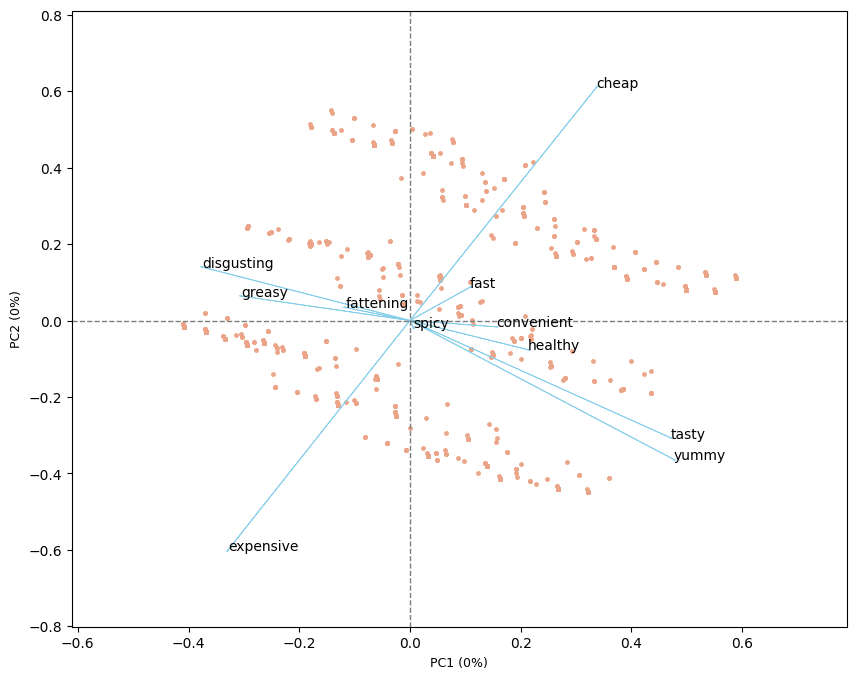

In [19]:
# plotting 2D biplot

from bioinfokit.visuz import cluster


cluster.biplot(cscore=data_pca, loadings=-rot,labels=data.columns.values,
               var1 =0,var2 =0,show = True, dim=(10,8))


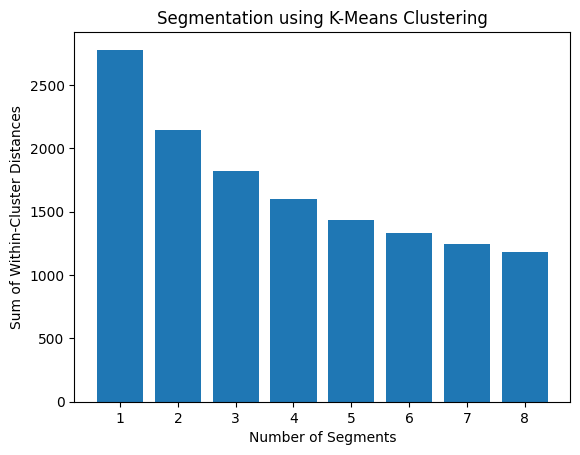

In [20]:
# K-Means Clustering:

from sklearn.cluster import KMeans

np.random.seed(1234)
nrep = 10

num_segk = range(1,9)
within_cluster_distances = []
data_km = {}

for n in num_segk:
    kmeans = KMeans(n_clusters=n,n_init = nrep, random_state=1234).fit(data)
    within_cluster_distances.append(kmeans.inertia_)
    data_km[str(n)] = kmeans

# plotting:
plt.bar(num_segk, within_cluster_distances)
plt.xlabel("Number of Segments")
plt.ylabel("Sum of Within-Cluster Distances")
plt.title("Segmentation using K-Means Clustering")
plt.show()


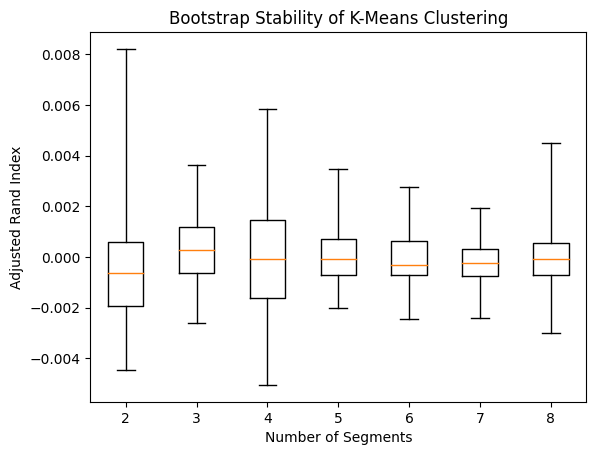

In [21]:
# Bootstrap Stability of K-Means Clustering

from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score


np.random.seed(1234)
nrep = 10
nboot = 100

bootstrap_within_cluster_distances = []

for i in range(nboot):
   bootstrap_sample = resample(data.values, random_state=i)
   bootstrap_within_cluster_distances.append(bootstrap_sample)

adjusted_rand_index = []
num_segb = range(2, 9)

for n in num_segb:
    stability = []
    for bootstrap_sample in bootstrap_within_cluster_distances:
        kmeans = KMeans(n_clusters=n, n_init=nrep, random_state=1234).fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(data.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability.append(stability_score)

    adjusted_rand_index.append(stability)

# Transposing the adjusted_rand_index :
adjusted_rand_index = np.array(adjusted_rand_index).T

# plotting:
plt.boxplot(adjusted_rand_index, labels=num_segb, whis=10)
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Stability of K-Means Clustering")
plt.show()


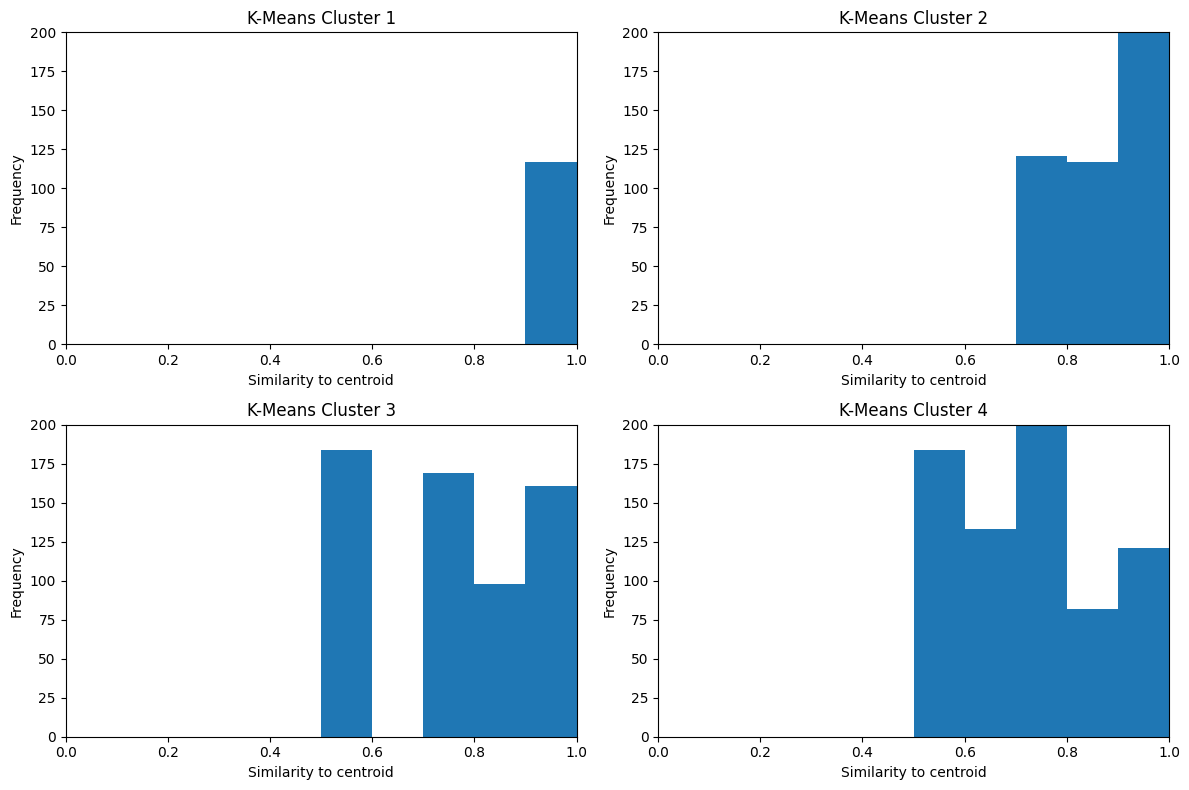

In [22]:
# Visualizing K-Means Clusters:

range_values = (0,1)
num_bins = 10
max_freq = 200

fig, axs = plt.subplots(2,2,figsize=(12,8))

for i in range(1,5):
    labels = data_km[str(i)].predict(data)
    similarities = data_km[str(i)].transform(data).min(axis=1)
    row = (i -1)//2
    col = (i-1)%2

    axs[row,col].hist(similarities, range = range_values, bins = num_bins)
    axs[row,col].set_title("K-Means Cluster {}".format(i))
    axs[row,col].set_xlabel("Similarity to centroid")
    axs[row,col].set_ylabel("Frequency")

    axs[row,col].set_ylim(0,max_freq)
    axs[row,col].set_xlim(range_values)

    axs[row,col].set_xticks([0,0.2,0.4,0.6,0.8,1.0])

plt.tight_layout()
plt.show()

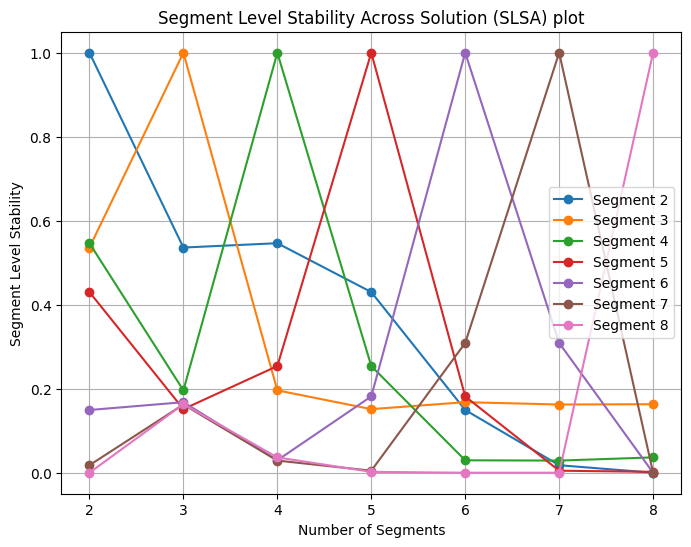

In [23]:
# Segment Stability Across Solutions(SLSA):

number_seg = range(2,9)

segment_stability = []
for segment in range(2,9):
    labels_seg = data_km[str(segment)].predict(data)
    segment_stability.append(labels_seg)

# Plotting:
plt.figure(figsize= (8,6))
for i, segment in enumerate(range(2,9)):
    plt.plot(number_seg, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f"Segment {segment}")

plt.xlabel("Number of Segments")
plt.ylabel("Segment Level Stability")
plt.title("Segment Level Stability Across Solution (SLSA) plot")
plt.xticks(number_seg)
plt.legend()
plt.grid(True)
plt.show()

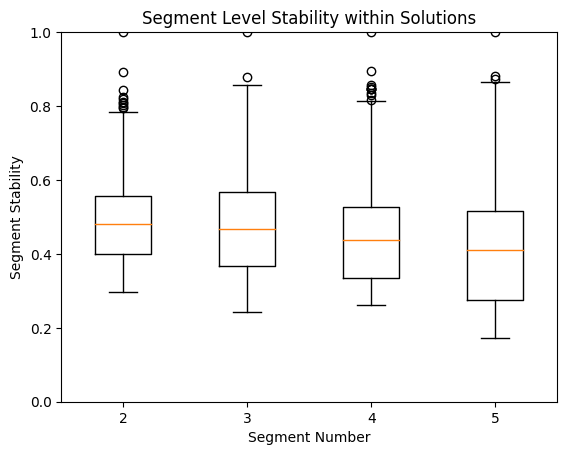

In [24]:
# Segment Stability within Solutions(SLSW):

segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = data_km[segment].predict(data)
    segment_similarities[segment] = data_km[segment].transform(data).min(axis=1)

segment_stability_values = []

for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

# Plotting:
plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

In [25]:
# Evaluation of K-Means Clustering:

from scipy.stats import entropy

np.random.seed(1234)



k_values = range(2, 9)
data_etr = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(data.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = data.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy

    data_etr.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))

data_etr = pd.DataFrame(data_etr, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])


print(data_etr)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     6       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1     6       True  3   3 -1818.717659  3643.435318  3659.279475  3658.209672
2     9       True  4   4 -1604.107292  3216.214583  3237.340126  3235.989403
3    11       True  5   5 -1434.610417  2879.220835  2905.627763  2904.035975
4     8       True  6   6 -1331.652440  2675.304880  2706.993194  2705.228430
5     6       True  7   7 -1248.417887  2510.835774  2547.805474  2545.884829
6     9       True  8   8 -1182.100019  2380.200037  2422.451123  2420.433939


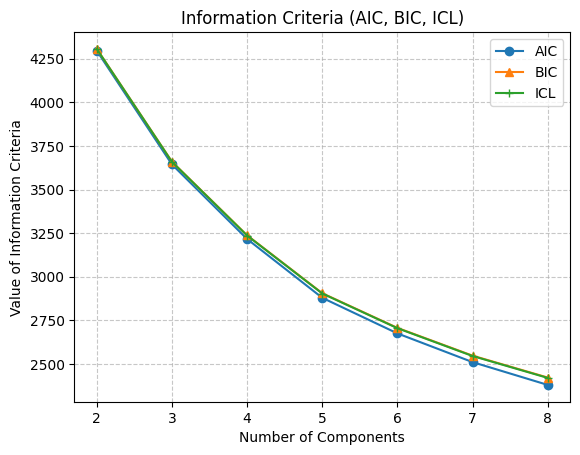

In [26]:

num_segments = data_etr["k"]
AIC_values = data_etr["AIC"]
BIC_values = data_etr["BIC"]
ICL_values = data_etr["ICL"]

plt.plot(num_segments, AIC_values, marker="o", label='AIC')
plt.plot(num_segments, BIC_values, marker="^", label='BIC')
plt.plot(num_segments, ICL_values, marker="+", label='ICL')

plt.xlabel('Number of Components')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [27]:
# Cross-tabulation:

from sklearn.mixture import GaussianMixture


k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(data)
kmeans_clusters = kmeans.predict(data)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(data)
gmm_clusters = gmm.predict(data)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

# Filtering the data
data_d4 = data[results['mixture'] == 3]

# KMeans clustering on the filtered data
k4_d4 = KMeans(n_clusters=k, random_state=1234)
k4_d4.fit(data_d4)
k4_d4_clusters = k4_d4.predict(data_d4)

results_d4 = pd.DataFrame({'kmeans': k4_d4_clusters, 'mixture': 3})


print("Cross-tabulation for initial clustering:")
print(pd.crosstab(results['kmeans'], results['mixture']))

print("\nCross-tabulation for KMeans clustering on filtered data:")
print(pd.crosstab(results['kmeans'], results_d4['kmeans']))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cross-tabulation for initial clustering:
mixture   0    1   2    3
kmeans                   
0        20  302   0  191
1         2  116  59  189
2        90   30  14  108
3        17  150   1  164

Cross-tabulation for KMeans clustering on filtered data:
kmeans   0   1   2   3
kmeans                
0       76  52  73  32
1       40  39  51  27
2       27  30  31  11
3       43  35  51  34


In [28]:
# Fit GMM to the first dataset

gmm_d4a = GaussianMixture(n_components=4)
gmm_d4a.fit(data)
log_likelihood_d4a = gmm_d4a.score(data)

# Fit GMM to the second dataset
gmm_d4 = GaussianMixture(n_components=4)
gmm_d4.fit(data)
log_likelihood_d4 = gmm_d4.score(data)


print("Log-likelihood for data_d4a:", log_likelihood_d4a)
print("Log-likelihood for data_d4:", log_likelihood_d4)

Log-likelihood for data_d4a: 11.727872558164462
Log-likelihood for data_d4: 11.151316714845965


In [29]:

like_counts = pd.value_counts(df['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)

-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: Like, dtype: int64


In [30]:
# Define a mapping of string values to numeric codes

like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

df['Like.n'] = df['Like'].map(like_mapping)


like_n_counts = df['Like.n'].value_counts()


print(like_n_counts)


 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: Like.n, dtype: int64


In [31]:
# Print the "df" column names:

print(df.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender', 'Like.n'],
      dtype='object')


In [32]:
# Print the "data" Column names:

print(data.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting'],
      dtype='object')


In [33]:

from patsy import dmatrices

independent_vars = df.columns[0:11]

formula_str = 'Like ~' + ' + '.join(independent_vars)

# Creating design matrix
design_matrix = dmatrices(formula_str, data=df)[1]


print(design_matrix)


[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [34]:
# Fit Gaussian Mixture Model:

from patsy import dmatrix

np.random.seed(1234)

x = dmatrix(design_matrix.design_info, data=df)

# Assuming 'Like' is the target variable
y = dmatrix('Like', data=df)

n_components = 2
n_init = 10
verbose = 0
n_rep = 10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose )
data_reg2 = model.fit(x, y)

print(data_reg2)
cluster_sizes = np.bincount(model.predict(x))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")


GaussianMixture(n_components=2, n_init=10)
Cluster sizes:
1: 468
2: 985


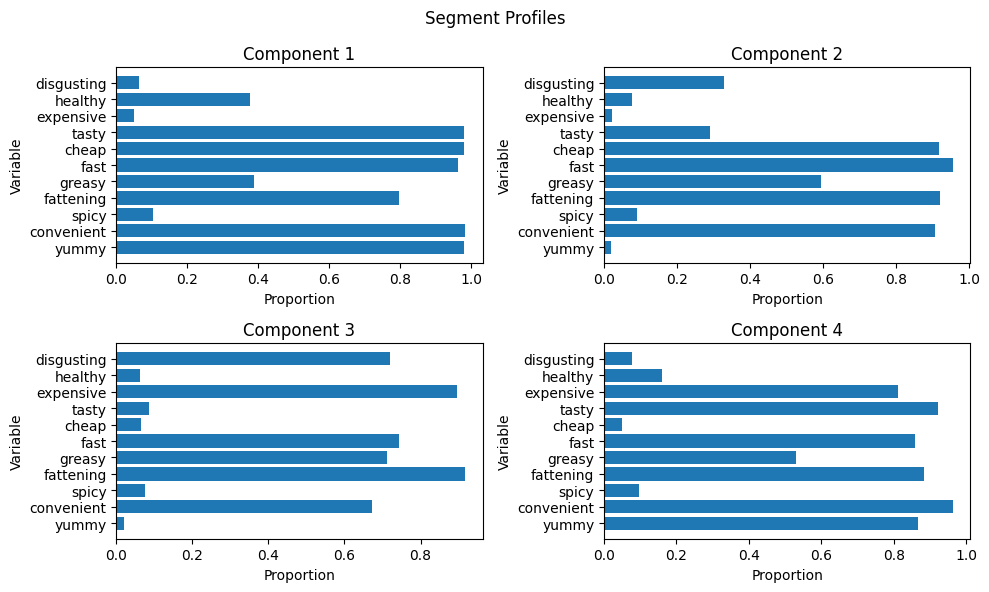

In [35]:
# Segment Profiles:

kmeans = data_km['4']

labels = kmeans.labels_

data_mean = data.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(data_mean.shape[1]), data_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(data_mean.shape[1]), data_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(data_mean.shape[1]), data_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(data_mean.shape[1]), data_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(data_mean.shape[1]))
    ax.set_yticklabels(data.columns)

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


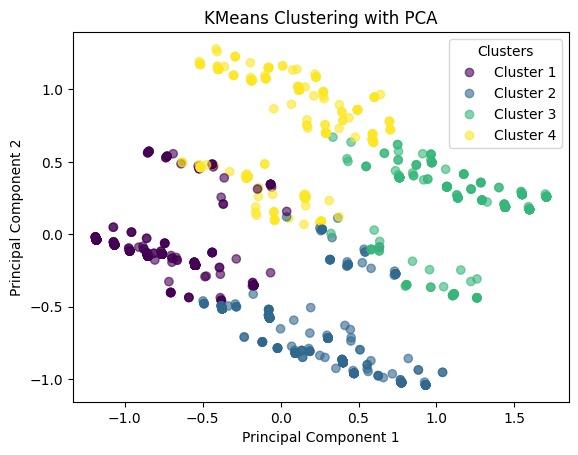

In [36]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

# Perform PCA dimensionality reduction:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

fig, ax = plt.subplots()

# Scatter plotting:
scatter = ax.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('KMeans Clustering with PCA')

legend_labels = [f'Cluster {i+1}' for i in range(4)]
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


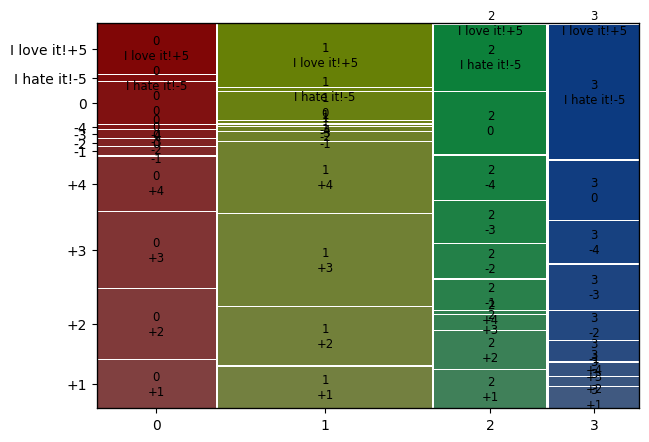

In [37]:
from statsmodels.graphics.mosaicplot import mosaic


def labelling(msp):
    df[msp] = LabelEncoder().fit_transform(df[msp])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for msp in cat:
    labelling(msp)

df_eleven = df.loc[:, cat]

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
df['cluster_num'] = kmeans.labels_

crosstab = pd.crosstab(df['cluster_num'], df['Like'])


plt.rcParams['figure.figsize'] = (7, 5)
mosaic(crosstab.stack())
plt.show()

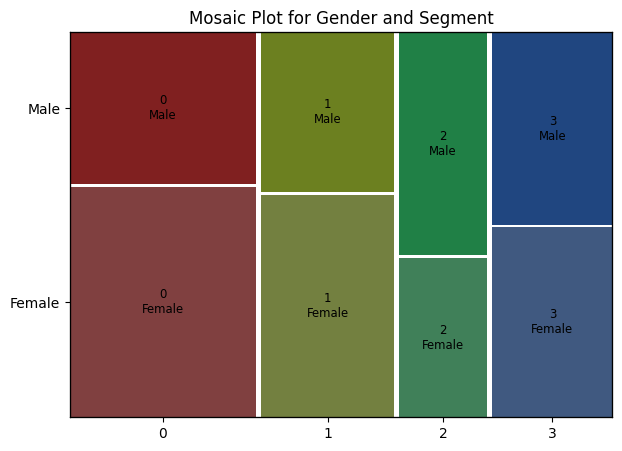

In [38]:

from statsmodels.graphics.mosaicplot import mosaic

data_k4 = data_km['4']
k4 = data_k4.labels_

ct = pd.crosstab(k4, df['Gender'])

# Plotting Mosaic Plot:
plt.rcParams['figure.figsize'] = (7, 5)
mosaic(ct.stack(), gap=0.01)
plt.title("Mosaic Plot for Gender and Segment")

plt.show()


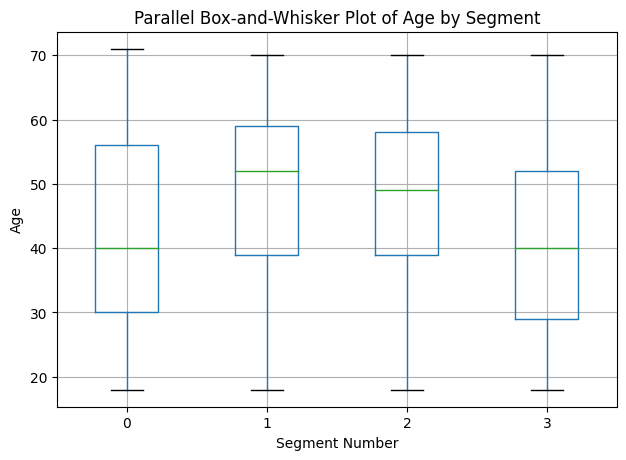

In [39]:

df_bwp = pd.DataFrame({"Segment": k4 , "Age": df['Age']})

# Create a boxplot grouped by 'Segment'
df_bwp.boxplot(by='Segment', column='Age')
plt.xlabel("Segment Number")
plt.ylabel("Age")
plt.title('Parallel Box-and-Whisker Plot of Age by Segment')
plt.suptitle('')

plt.show()

In [40]:

df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()

visit


,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [41]:

df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()

Like


,cluster_num,Like
0,0,3.798762
1,1,3.794828
2,2,5.430921
3,3,6.739837


In [42]:

df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()

Gender


,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


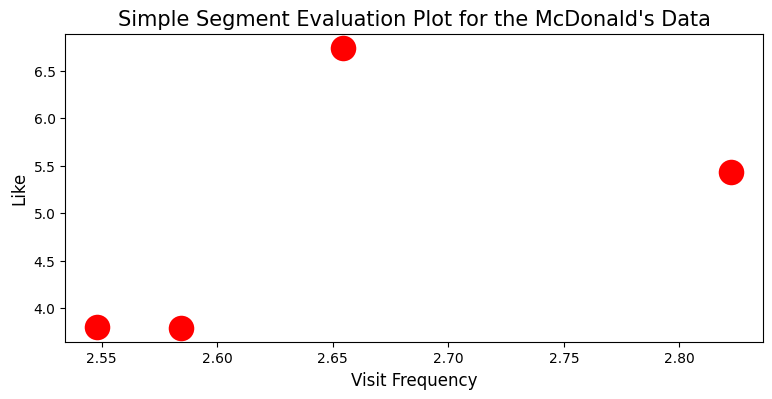

In [43]:
# Merging and plotting:

segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')

plt.figure(figsize=(9, 4))
sns.scatterplot(x="VisitFrequency", y="Like", data=segment, s=400, color="r")
plt.title("Simple Segment Evaluation Plot for the McDonald's Data", fontsize=15)
plt.xlabel("Visit Frequency", fontsize=12)
plt.ylabel("Like", fontsize=12)
plt.show()
